#### Importing Excel File to Python using Openpyxl
Source: https://www.datacamp.com/tutorial/python-excel-tutorial

In [ ]:
# Anaconda Prompt
# conda activate ox
# pip install Openpyxl

#### My Test Run

In [1]:
import networkx as nx
import osmnx as ox

ox.__version__

'1.8.0'

In [2]:
# import nodes from excel file
import openpyxl 

wb = openpyxl.load_workbook('from_qgis.xlsx')
ws = wb['Coordinates']
nodes_list = [ws.cell(row=i,column=2).value for i in range(2,199+1)]
coordinates_list = [ws.cell(row=i,column=3).value for i in range(2,199+1)]
bus_stops = {nodes: coordinates for nodes, coordinates in zip(nodes_list, coordinates_list)}
print(bus_stops)

{'Monumento': '14.654455,120.983795', 'Malanday': '14.718282,120.957038', 'Mall of Asia': '14.535539,120.983720', 'PITX': '14.510395,120.992016', 'VGC': '14.711829,120.993211', 'North EDSA': '14.654670,121.029643', 'Fairview': '14.735339,121.060035', 'Quezon Ave': '14.641742,121.039311', 'Malaria': '14.769677,121.079772', 'Buendia': '14.554238,120.997071', 'Taft': '14.538141,121.000674', 'Northview': '14.684234,121.104832', 'Cubao': '14.621686,121.050018', 'Nangka': '14.669971,121.108374', 'Sta. Lucia Grandmall': '14.620197,121.099643', 'Gilmore': '14.613692,121.034162', 'D. Jose': '14.605315,120.981974', 'SM City East Ortigas': '14.588577,121.105247', 'Kalentong': '14.593758,121.026940', 'Pasig': '14.559793,121.080534', 'BGC': '14.548876,121.056359', 'Ayala': '14.549203,121.027902', 'Sucat': '14.453845,121.044929', 'Alabang': '14.415366,121.045285', 'SM Center Muntinlupa': '14.377987,121.046291', 'FTI-Taguig': '14.506545,121.035636', 'Victoneta Ave': '14.665638,120.984136', 'Marulas':

In [ ]:
# visualize nodes using GIS shapefile
# Source: https://www.linkedin.com/pulse/using-geopandas-display-shapefiles-jupyter-notebooks-andrew-cutts/

# first, install GeoPandas package
# conda install geopandas

In [3]:
import geopandas as gpd

gdf = gpd.read_file('final_nodes_MM.shp')
print (gdf)

                       geometry
0    POINT (120.98385 14.65433)
1    POINT (120.98416 14.66561)
2    POINT (120.98145 14.67466)
3    POINT (120.97647 14.68567)
4    POINT (120.97468 14.68873)
..                          ...
193  POINT (121.01519 14.43095)
194  POINT (121.03081 14.42490)
195  POINT (121.05557 14.54046)
196  POINT (121.05635 14.52774)
197  POINT (121.05442 14.52292)

[198 rows x 1 columns]


<Axes: >

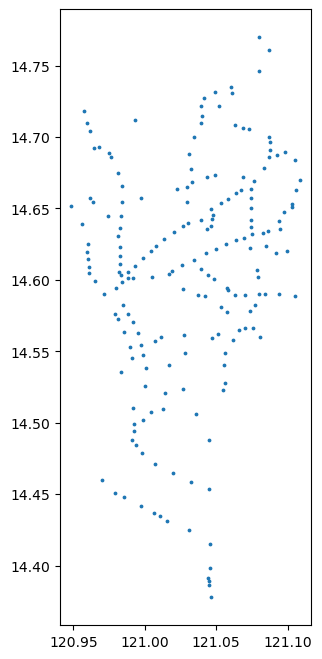

In [4]:
%matplotlib inline

# Source: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html
gdf.plot(markersize=3.0, figsize=(12,8))

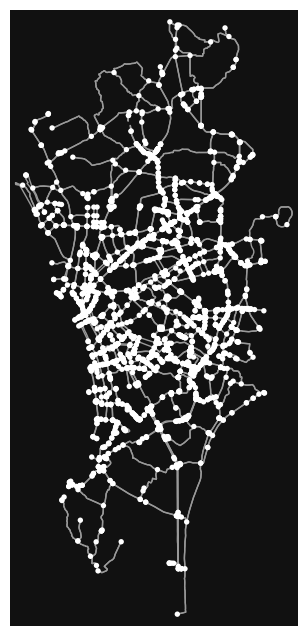

2742

In [5]:
# visualize nodes using OSMnx package in Python

from matplotlib import pyplot as plt

place = 'Metro Manila, Philippines'
G = ox.graph_from_place(place, network_type="drive", custom_filter='["highway"~"primary|secondary"]')

# Plot the streets
fig, ax = ox.plot_graph(G)

# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(G)
#nodes.head()
#nodes.tail()
len(nodes)

<Axes: >

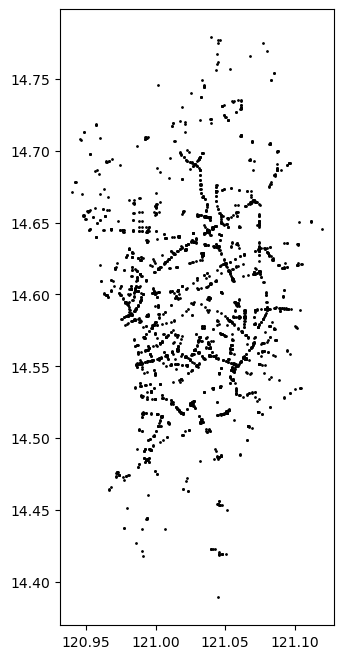

In [6]:
# Plot the nodes
fig, ax = plt.subplots(figsize=(12,8))
nodes.plot(ax=ax, facecolor='black', markersize=1.0)

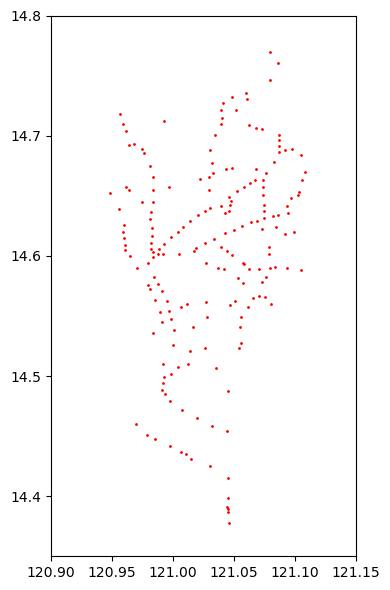

In [9]:
# visualize nodes using Excel file generated from QGIS

def plot_original_nodes():
    from matplotlib import pyplot as plt

    plt.rcParams["figure.figsize"] = [4,6]
    plt.rcParams["figure.autolayout"] = True
    plt.xlim(120.90, 121.15)
    plt.ylim(14.35, 14.80)

    for i in range(0,198):
        cxy = coordinates_list[i]
        separatexy = cxy.split(",")
        x = float(separatexy[1])
        y = float(separatexy[0])
        plt.plot(x, y, marker="o", markersize=1, markeredgecolor="red", markerfacecolor="green")

    plt.show()

plot_original_nodes()

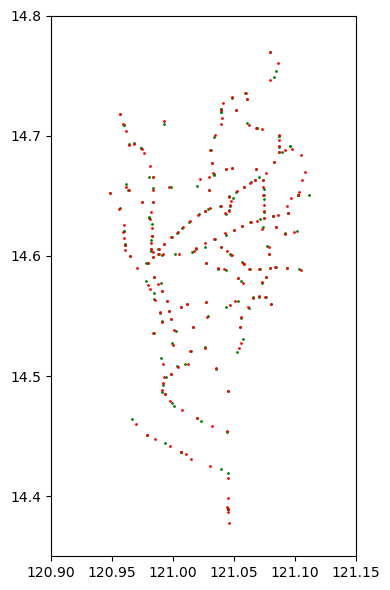

{'Monumento': (120.9838113, 14.6568151), 'Malanday': (120.9570582, 14.7182588), 'Mall of Asia': (120.984787, 14.535592), 'PITX': (120.9904252, 14.5147183), 'VGC': (120.9928228, 14.7097264), 'North EDSA': (121.0298618, 14.6547958), 'Fairview': (121.0590558, 14.7352821), 'Quezon Ave': (121.0390942, 14.6415717), 'Malaria': (121.0800828, 14.7693494), 'Buendia': (120.997097, 14.5541518), 'Taft': (121.003129, 14.5376696), 'Northview': (121.096267, 14.6912142), 'Cubao': (121.0499577, 14.6215736), 'Nangka': (121.1119338, 14.6508743), 'Sta. Lucia Grandmall': (121.1017933, 14.6206015), 'Gilmore': (121.0346112, 14.6138624), 'D. Jose': (120.9819871, 14.605716), 'SM City East Ortigas': (121.1038256, 14.5888623), 'Kalentong': (121.0270245, 14.593744), 'Pasig': (121.0806473, 14.5598282), 'BGC': (121.0563829, 14.5481828), 'Ayala': (121.0291888, 14.5503159), 'Sucat': (121.0448073, 14.4538301), 'Alabang': (121.0455703, 14.4189863), 'SM Center Muntinlupa': (121.0449847, 14.389226), 'FTI-Taguig': (121.035

In [25]:
# visualize the new nodes which are the nearest nodes to the above bus stops

# from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [4,6]
plt.rcParams["figure.autolayout"] = True
plt.xlim(120.90, 121.15)
plt.ylim(14.35, 14.80)

# finds the nearest node to a bus stop
def new_stop(bus_stop):
    lat, long = bus_stop.split(",") 
    X = float(long) 
    Y = float(lat) 
    new_stop_id = ox.nearest_nodes(G, X, Y)
    x = G.nodes[new_stop_id]['x'] 
    y = G.nodes[new_stop_id]['y']
    return x,y

# initialize list of coordinates of new nodes
new_coordinates_list = []

for i in range(0,198):
    bus_stop = coordinates_list[i]
    x,y = new_stop(bus_stop)
    # store the list of coordinates of new nodes
    zipxy = lambda x,y:(x,y)
    c = zipxy(x,y)
    new_coordinates_list.append(c)
    # plot/visualize the new nodes
    plt.plot(x, y, marker="o", markersize=1, markeredgecolor="green", markerfacecolor="green")

plot_original_nodes()
plt.show()

new_bus_stops = {nodes: coordinates for nodes, coordinates in zip(nodes_list, new_coordinates_list)}
print(new_bus_stops)

In [81]:
# define the edge (or connectivity) between nodes 
# by using a connectivity matrix (1 if connected, 0 otherwise)

# assign a number for each node
node_numbers = list(zip(range(1,199),nodes_list,new_coordinates_list))
print(node_numbers[0:5])

def node_connectivity():
    # define original routes
    import openpyxl 
    wb = openpyxl.load_workbook('from_qgis.xlsx')
    ws = wb['Final Nodes']
    
    R1 = [ws.cell(row=i,column=3).value for i in range(2,11+1)]
    R2 = ['Monumento'] + [ws.cell(row=i,column=3).value for i in range(12,31+1)]
    R3 = ['Monumento'] + [ws.cell(row=i,column=3).value for i in range(32,33+1)]
    R4 = [ws.cell(row=i,column=3).value for i in range(34,46+1)]
    R5 = [ws.cell(row=i,column=3).value for i in range(47,70+1)]
    R6 = ['Quezon Ave'] + [ws.cell(row=i,column=3).value for i in range(71,88+1)]
    R7 = R5[0:12+1] + [ws.cell(row=i,column=3).value for i in range(89,91+1)]
    R8 = [ws.cell(row=i,column=3).value for i in range(92,105+1)]
    R9 = R8[0:5] + [ws.cell(row=i,column=3).value for i in range(106,108+1)]
    R10 = ['Cubao'] + [ws.cell(row=i,column=3).value for i in range(109,118+1)]
    R11 = ['Gilmore'] + [ws.cell(row=i,column=3).value for i in range(119,129+1)]
    R12 = [ws.cell(row=i,column=3).value for i in range(130,137+1)]
    R13 = ['Buendia'] + [ws.cell(row=i,column=3).value for i in range(138,144+1)]
    R14 = ['Ayala', 'Chino Roces', 'Osmena Highway'] + [ws.cell(row=i,column=3).value for i in range(146,149+1)]
    R15 = R14 + [ws.cell(row=i,column=3).value for i in range(150,154+1)]
    R16 = R14[0:4] + [ws.cell(row=i,column=3).value for i in range(155,156+1)]
    R17 = ['Monumento, 5th Ave'] + [ws.cell(row=i,column=3).value for i in range(157,161+1)] + ['D. Jose'] + R6[11:18+1]
    R18 = ['PITX'] + [ws.cell(row=i,column=3).value for i in range(162,165+1)] + ['Taft', 'Mall of Asia']
    R19 = R4[0:4] + [ws.cell(row=i,column=3).value for i in range(166,179+1)] + ['BGC']
    R23 = ['PITX'] + [ws.cell(row=i,column=3).value for i in range(180,187+1)] + ['Sucat']
    R24 = ['PITX'] + [ws.cell(row=i,column=3).value for i in range(188,196+1)] + ['Alabang']
    R25 = ['BGC'] + [ws.cell(row=i,column=3).value for i in range(197,199+1)] + ['Bicutan', 'Sucat', 'Alabang']
    print(R25)

node_connectivity()

[(1, 'Monumento', (120.9838113, 14.6568151)), (2, 'Malanday', (120.9570582, 14.7182588)), (3, 'Mall of Asia', (120.984787, 14.535592)), (4, 'PITX', (120.9904252, 14.5147183)), (5, 'VGC', (120.9928228, 14.7097264))]
['BGC', 'Upper McKinley Rd', 'Diego Silang', 'Pinagsama', 'Bicutan', 'Sucat', 'Alabang']


In [33]:
# plot/visualize the original route set


In [19]:
# impute missing edge speeds and calculate edge travel times with the speed module
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

# get the time matrix

In [16]:
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)
edges_series = edges['length'] #gives you a pandas series with edge lengths
edges[['osmid','length']] #gives you a pandas dataframe with osmids of edges and their corresponding lengths

osmid  \
u           v           key                                                      
12067308    24798154    0    [224039651, 224039654, 224039655, 1059061389, ...   
12067395    990043712   0                                  [2667099, 85396158]   
            1934653694  0                                            675183383   
12067407    316549463   0                               [1035321072, 13867004]   
            12067409    0                                            709075245   
...                                                                        ...   
11210054859 9885708244  0                                            333533874   
            11210054856 0                                           1210020852   
11260251486 7040080108  0                                            655540530   
11297456532 8598095314  0                             [1102471537, 1219269818]   
            8627337943  0    [1065946075, 1226577800, 930447177, 930455691,...   

                              length  
u           v           key           
12067308    24798154    0    938.648  
12067395    990043712   0    224.607  
            1934653694  0    177.451  
12067407    316549463   0     86.172  
            12067409    0     19.490  
...                              ...  
11210054859 9885708244  0     33.269  
            11210054856 0     64.067  
11260251486 7040080108  0    323.569  
11297456532 8598095314  0     16.951  
            8627337943  0    430.311  

[4815 rows x 2 columns]

In [20]:
len(edges)

4815

In [11]:
# impute missing edge speeds and calculate edge travel times with the speed module
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

# get the nearest network nodes to two lat/lng points with the distance module
orig = new_coordinates_list[0]
dest = new_coordinates_list[3]
print(orig)
print(dest)

(x1,y1) = orig
(x2,y2) = dest
orig = ox.distance.nearest_nodes(G, x1, y1)
dest = ox.distance.nearest_nodes(G, x2, y2)
print(orig)
print(dest)

print(G.nodes[orig]['x'],G.nodes[orig]['y'])
print(G.nodes[dest]['x'],G.nodes[dest]['y'])

(120.9838113, 14.6568151)
(120.9904252, 14.5147183)
67749699
8658612483
120.9838113 14.6568151
120.9904252 14.5147183


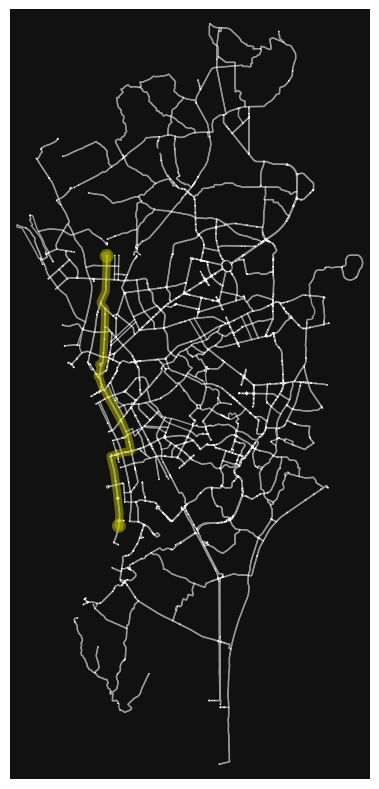

In [12]:
# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, route_color="y", route_linewidth=6, node_size=1)

In [ ]:
# candidate routes using all possible O-D pairs generated by osmnx: k-means
# route to nodes

In [ ]:
# import barangay nodes and get the nearest bus node for each

In [ ]:
# determine the travel demand matrix

In [3]:
# using Matlab, determine the route set
# plot/visualize the resulting route set